In [7]:
#Importing libraries we will need
import numpy as np
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from numba import jit #acceleration of the code
from numba import njit
from numba.core import types
from numba.typed import Dict

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import copy
import networkx as nx
from copy import copy, deepcopy

import pandas as pd


/var/folders/vs/_hc6ll590rd_sq72lswvg15r0000gn/T/ipykernel_4420/297313638.py:12: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [8]:
#Customary libraries
import connectivities as cn #Different network connectivities
import physiological_neurons as ph #Dynamics of leaky integrate ad fire neurons
import parameters as pr #Parameters of the simulation
test = pr.my_params()
print(test)
unitest = pr.my_params_uniform()
print(unitest)

{EPSP_decay: 0.9980019986673331, refr: 60.0, mu: 2.581897201100609, n_timesteps: 10000.0, sigma: 0.5023007067516441, tau_s: 10.0, tau_m: 500.0, V_threshold: 12.3, n_neurons: 1000.0, stepsize: 0.05, ER connection probability: 0.065, Average synaptic delay: 26.0, Standard deviation for synaptic delay: 22.0, Noise Frequency: 2.5e-05, Laser strength: 10000.0, Laser mean period: 784.0, Standard deviation of laser period: 94.0, Number of spikes: 7.0, Number of laser activated neurons: 900.0, Mean delay for the first spike from laser activation: 400.0, Standard deviation for the delay of the first spike: 60.0}
{EPSP_decay: 0.9980019986673331, refr: 60.0, mu: 300.0, n_timesteps: 10000.0, sigma: 1.5, tau_s: 10.0, tau_m: 500.0, V_threshold: 12.3, n_neurons: 1000.0, stepsize: 0.05, ER connection probability: 0.065, Average synaptic delay: 26.0, Standard deviation for synaptic delay: 22.0, Noise Frequency: 2.5e-05, Laser strength: 10000.0, Laser mean period: 784.0, Standard deviation of laser peri

In [9]:
par = pr.my_params()
parUni = pr.my_params_uniform()
print(par)
#parNorm = pr.my_params_normal()
M, edges, W_matrix, syn_del = cn.generate_network(par)
N = int(par['n_neurons'])
n_activated = int(par['Number of laser activated neurons'])
print("n_activated = ", n_activated)

#gotta rerun this cell if you change the number of activated neurons
set_activated = cn.active_set(N, n_activated) #activated neurons are chosen
#line below - creates the input matrix (voltage vs time for each of the activated neurons)    
input_matrix = ph.prepare_input2(par, set_activated)
noise_fraction = 0.0 #fraction of noicy neurons

noise_vector = ph.create_noise_vector(N, noise_fraction)


{EPSP_decay: 0.9980019986673331, refr: 60.0, mu: 2.581897201100609, n_timesteps: 10000.0, sigma: 0.5023007067516441, tau_s: 10.0, tau_m: 500.0, V_threshold: 12.3, n_neurons: 1000.0, stepsize: 0.05, ER connection probability: 0.065, Average synaptic delay: 26.0, Standard deviation for synaptic delay: 22.0, Noise Frequency: 2.5e-05, Laser strength: 10000.0, Laser mean period: 784.0, Standard deviation of laser period: 94.0, Number of spikes: 7.0, Number of laser activated neurons: 900.0, Mean delay for the first spike from laser activation: 400.0, Standard deviation for the delay of the first spike: 60.0}
n_activated =  900


In [10]:
# Lists to store times for both parameter sets
times_parUni = []
times_par = []

for i in range(100):
    _, _, t = ph.full_process(edges, syn_del, input_matrix,
                              W_matrix, parUni, noise_vector)
    times_parUni.append(t)  # Convert time to seconds

    _, _, t = ph.full_process(edges, syn_del, input_matrix,
                              W_matrix, par, noise_vector)
    times_par.append(t)  # Convert time to seconds

    # print('Iteration:', i)
    # print('Time uni:', t * 0.05)
    # print('Time lognm:', t * 0.05)

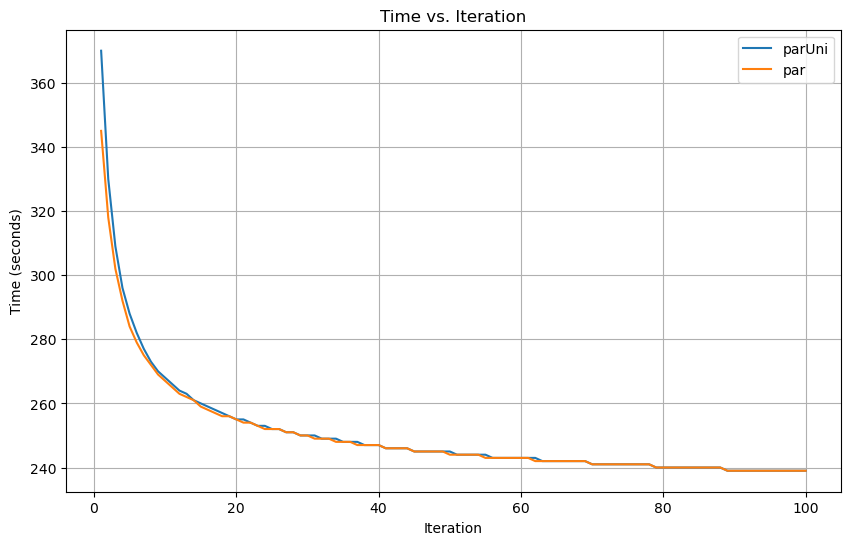

In [11]:

# Plotting times against iteration number
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), times_parUni, label='parUni')
plt.plot(range(1, 101), times_par, label='par')
plt.xlabel('Iteration')
plt.ylabel('Time (seconds)')
plt.title('Time vs. Iteration')
plt.legend()
plt.grid(True)
plt.show()
print("time_parUNI" ,times_parUni)
print("times_par", times_par)

{EPSP_decay: 0.9980019986673331, refr: 60.0, mu: 2.581897201100609, n_timesteps: 10000.0, sigma: 0.5023007067516441, tau_s: 10.0, tau_m: 500.0, V_threshold: 12.3, n_neurons: 1000.0, stepsize: 0.05, ER connection probability: 0.065, Average synaptic delay: 26.0, Standard deviation for synaptic delay: 22.0, Noise Frequency: 2.5e-05, Laser strength: 10000.0, Laser mean period: 784.0, Standard deviation of laser period: 94.0, Number of spikes: 7.0, Number of laser activated neurons: 900.0, Mean delay for the first spike from laser activation: 400.0, Standard deviation for the delay of the first spike: 60.0}
{EPSP_decay: 0.9980019986673331, refr: 60.0, mu: 300.0, n_timesteps: 10000.0, sigma: 1.5, tau_s: 10.0, tau_m: 500.0, V_threshold: 12.3, n_neurons: 1000.0, stepsize: 0.05, ER connection probability: 0.065, Average synaptic delay: 26.0, Standard deviation for synaptic delay: 22.0, Noise Frequency: 2.5e-05, Laser strength: 10000.0, Laser mean period: 784.0, Standard deviation of laser peri

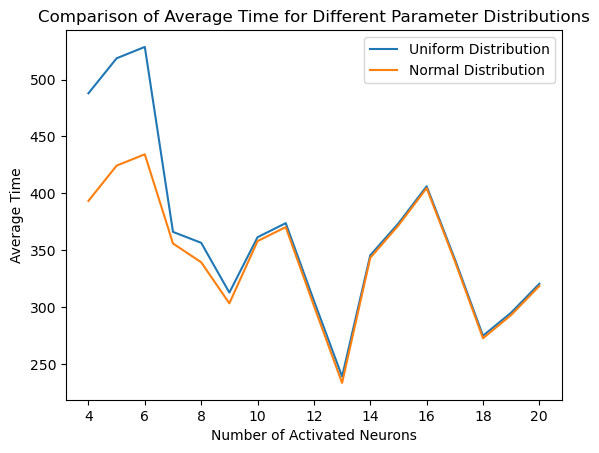

In [12]:
# Customary libraries
import connectivities as cn  # Different network connectivities
import physiological_neurons as ph  # Dynamics of leaky integrate and fire neurons
import parameters as pr  # Parameters of the simulation

# Define the parameter sets
par = pr.my_params()
parUni = pr.my_params_uniform()

# Print parameter sets for verification
print(par)
print(parUni)

# Generate network parameters
M, edges, W_matrix, syn_del = cn.generate_network(par)
N = int(par['n_neurons'])
noise_fraction = 0.0  # Fraction of noisy neurons
input_matrix = None  # Initialize input matrix

# Lists to store average times for both parameter sets
avg_times_parUni = []
avg_times_par = []

# Loop through the range of activated neurons (4 to 9)
for n_activated in range(4, 21):
    print("Number of activated neurons:", n_activated)

    # Update the number of activated neurons in the parameter sets
    par['Number of laser activated neurons'] = n_activated
    parUni['Number of laser activated neurons'] = n_activated

    # Generate active neuron set based on the updated number of activated neurons
    set_activated = cn.active_set(N, n_activated)

    # Generate input matrix for the current configuration
    input_matrix = ph.prepare_input2(par, set_activated)

    # Lists to store times for the current configuration
    times_parUni = []
    times_par = []

    # Run simulations 10 times for each parameter set and compute average time
    for i in range(100):
        _, _, t = ph.full_process(edges, syn_del, input_matrix,
                                  W_matrix, parUni, noise_vector)
        times_parUni.append(t)  # Convert time to seconds

        _, _, t = ph.full_process(edges, syn_del, input_matrix,
                                  W_matrix, par, noise_vector)
        times_par.append(t)  # Convert time to seconds

    # Compute average time for the current configuration and store it
    avg_time_parUni = sum(times_parUni) / len(times_parUni)
    avg_time_par = sum(times_par) / len(times_par)
    avg_times_parUni.append(avg_time_parUni)
    avg_times_par.append(avg_time_par)

# Plotting the results
import matplotlib.pyplot as plt

# X-axis: Number of activated neurons, Y-axis: Average time
plt.plot(range(4, 21), avg_times_parUni, label='Uniform Distribution')
plt.plot(range(4, 21), avg_times_par, label='Normal Distribution')

# Add labels and legend
plt.xlabel('Number of Activated Neurons')
plt.ylabel('Average Time')
plt.title('Comparison of Average Time for Different Parameter Distributions')
plt.legend()

# Show plot
plt.show()


In [ ]:
#Simulaton2
print(avg_time_par)
print(avg_time_parUni)
